In [188]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

## `hex.line()`

In this short notebook, we look at the `hex.line` method. 
It is a multi-purpose method whose main purpose is to draw one line segment between two points inside or on the hexagon.
(In special cases, there can be multiple lines, or points can be outside the hexagon, but that is rare.)

We need to get hold of 2 endpoints (`start` and `end`). Once we have both of those, we can draw a line (and optionally arcs) 

Here are the various ways in which the `line()` method can be use.

1. From center to vertices (spokes) - One or all size spokes
2. From Center to EMP (edge mid points)
3. Center to Edge (edge = [0..5]). THe point can be random or specified distance from a vertex.

4. Vertex to Vertex

4. Edge to Vertex

4. Edge to Edge (say e1 to e4, start_pt_dist, end_pt_dist)
    Line random point on e1, and another on e4

5. From pt to edge, Angle is specified. (say from e3, at 30 degree to until another edge is met)

`stpt_name = ['center', 'edge', 'vertex', 'spoke', 'apotherm']`
`endpt_name = ['center', 'edge', 'vertex', 'spoke', 'apotherm']`


# Plot "Spokes: from Center to the Vertices

## `h.line(start_point='center', endpoint='vertex', dist=None, index=None)`

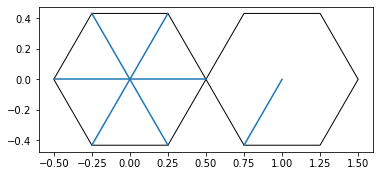

In [190]:
h = Hex(0, 0, size=0.5)
h.render(fc='none', color='k')
h.line(start_point='center', end_point='vertices')


h1 = Hex(1, 0, size=0.5)
h1.render(fc='none', color='k')
h1.line('center', 'v4', index=0)
    
    
plt.axis('scaled');

## h.line(start_point='edge', end_point='edge') 
Draws a random line from any edge to any other edge

## h.line(start_point='edge', end_point='edge', st_pos='random', end_pos='mid') 
Draws a random line from any edge to any other edge


## h.line(start_point='e4', end_point='edge', st_pos='random', end_pos='0.8') 
Draws a random line from a random point on edge-4 to some other edge, but 0.8 of size away from the vertex



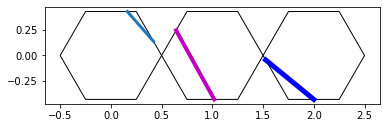

In [192]:
h0 = Hex(0, 0, size=0.5)
h1 = Hex(1, 0, size=0.5)
h2 = Hex(2, 0, size=0.5)

for h in [h0,h1,h2]:
    h.render(fc='none', color='k')


h0.line(start_point='edge', end_point='edge', lw=3)
h1.line(start_point='edge', end_point='e2', start_pos='random', end_pos='rnd', color='m', lw=4)
h2.line(start_point='e4', end_point='e3', start_pos='mid', end_pos=0.1, color='b', lw=5)
    
    
plt.axis('scaled');



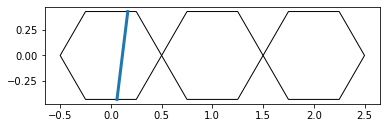

In [193]:
h0 = Hex(0, 0, size=0.5)
h1 = Hex(1, 0, size=0.5)
h2 = Hex(2, 0, size=0.5)

for h in [h0,h1,h2]:
    h.render(fc='none', color='k')


h0.line(start_point='e4', start_pos='med', end_point='edge', lw=3)
#h1.line(start_point='edge', end_point='e2', start_pos='random', end_pos='rnd', color='m', lw=4)
#h2.line(start_point='e4', end_point='e3', start_pos='mid', end_pos=0.1, color='b', lw=5)
    
    
plt.axis('scaled');



There is one special case of h.line(), which is the h.parallel_line(). It is a convenience method ('syntactic sugar') wrapper over h.line().


## h.parallel_line('edge_name', dist_frac)

Note that e3 means that the line-segment will touch e2 and e4 and be parallel to e3

In [214]:
def parallel_line(h, edge_name, dist_frac, **kwargs):
    
    edgenum = int(edge_name[-1])
    start_e = 'e' + str((edgenum-1)%6)
    end_e = 'e' + str((edgenum+1)%6)
                  
    h.line(start_point=start_e, end_point=end_e, start_pos=1-dist_frac, end_pos=dist_frac, **kwargs)
    

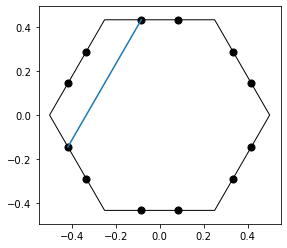

In [223]:
h = Hex(0, 0, size=0.5)
h.render(fc='none', color='k')

h.render_parallel_line('e2', 1/3)

#h.line(start_point='e2', end_point='e4', start_pos=1-dist, end_pos=dist)

xys = h.point('edge', action='trisect', index=None) 
for p in xys:
    plt.scatter(p[0],p[1], color='k', s=50)

plt.axis('scaled');

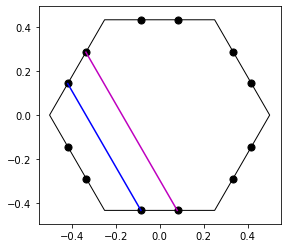

In [224]:
h = Hex(0, 0, size=0.5)
h.render(fc='none', color='k')

dist=0.66
h.line(start_point='e2', end_point='e4', start_pos=1-dist, end_pos=dist, color='m')
dist=0.33
h.line(start_point='e2', end_point='e4', start_pos=1-dist, end_pos=dist, color='b')

xys = h.point('edge', action='trisect', index=None) 
for p in xys:
    plt.scatter(p[0],p[1], color='k', s=50)

plt.axis('scaled');

ALLOWABLE_POINT_NAMES = `['center', 'edge', 'vert', 'vertex', 'spoke']`

